In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import pprint


## Part 1: Getting the Data
## get SVEN's portfolio




In [117]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

#import importlib
#importlib.reload(myauz.myalpha_funcs)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
import datetime
import pandas as pd



In [118]:
alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha)


api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
print('root_path: ',root_path)

read_from_alphavantage = False
rename_column = True


usecols = ["timestamp", "adjusted_close"]
startd = "2020-01-01"
endd = "2020-12-28"

print('usecols:', usecols)
print('startd',startd)
print('endd',endd)


Directory  /home/pi/Documents/Python/data  already exists

 77K8XPSR3XWWZJ80
root_path:  /home/pi/Documents/Python
usecols: ['timestamp', 'adjusted_close']
startd 2020-01-01
endd 2020-12-28


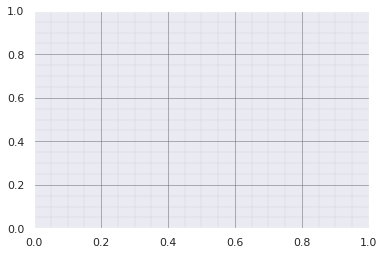

In [119]:
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')

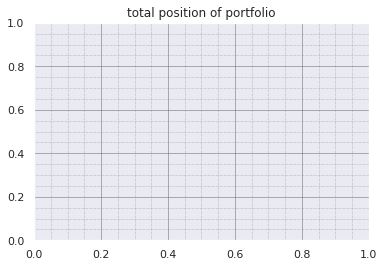

In [120]:
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()
plt.title("total position of portfolio")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [157]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)

bool_list_all = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

bool_list_high_tech = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_industry = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_consumer = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

colors = [
    'magenta',
    'lime',
#   'tab:orange',
    'blue',
    'black',
    'slategrey',
    'brown',
    'olive',
    'darkviolet',
    'red',
    'turquoise',
    'forestgreen',
    'gold',
]

color_dict = dict(zip(symbol_list, colors))
print('\n')
print(color_dict)

{'ATR': '/home/pi/Documents/Python/data/ATR/daily_ATR.csv',
 'CL': '/home/pi/Documents/Python/data/CL/daily_CL.csv',
 'DHR': '/home/pi/Documents/Python/data/DHR/daily_DHR.csv',
 'EMR': '/home/pi/Documents/Python/data/EMR/daily_EMR.csv',
 'GOOG': '/home/pi/Documents/Python/data/GOOG/daily_GOOG.csv',
 'HEINY': '/home/pi/Documents/Python/data/HEINY/daily_HEINY.csv',
 'HXGBY': '/home/pi/Documents/Python/data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '/home/pi/Documents/Python/data/LDSVF/daily_LDSVF.csv',
 'MCD': '/home/pi/Documents/Python/data/MCD/daily_MCD.csv',
 'MSFT': '/home/pi/Documents/Python/data/MSFT/daily_MSFT.csv',
 'NVS': '/home/pi/Documents/Python/data/NVS/daily_NVS.csv',
 'NVZMY': '/home/pi/Documents/Python/data/NVZMY/daily_NVZMY.csv'}


{'MSFT': 'magenta', 'GOOG': 'lime', 'DHR': 'blue', 'EMR': 'black', 'ATR': 'slategrey', 'HXGBY': 'brown', 'NVS': 'olive', 'NVZMY': 'darkviolet', 'CL': 'red', 'MCD': 'turquoise', 'HEINY': 'forestgreen', 'LDSVF': 'gold'}


In [122]:
#df[cols].plot(color = [color_dict.get(x, _) for x in df.columns])

# Full refresh of DB con time delay
# use refresh_db(root_path, api_key_alpha, symbol_list, False)


In [123]:
# importcsv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX
"""
symbol_list_full_refresh= [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

symbol_list_full_refresh = ['NVZMY']
# persist_data(symbol_list_full_refresh, _dict, _path_list)
full_refresh_alphavantage = True

refresh_db(root_path, api_key_alpha, symbol_list_full_refresh)
"""


'\nsymbol_list_full_refresh= [\n   "MSFT",\n   "GOOG",    \n   "AMZN",    \n   "DHR",\n   "EMR",\n   "ATR",\n   "HXGBY",\n   "NVS",\n   "NVZMY",    \n   "CL",\n   "MCD",    \n   "HEINY",\n   "LDSVF",  \n]\n\nsymbol_list_full_refresh = [\'NVZMY\']\n# persist_data(symbol_list_full_refresh, _dict, _path_list)\nfull_refresh_alphavantage = True\n\nrefresh_db(root_path, api_key_alpha, symbol_list_full_refresh)\n'

In [124]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "adjusted_close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 
pf.tail()

                  MSFT     GOOG         DHR        EMR         ATR      HXGBY  \
2020-01-02  158.935751  1367.37  154.612761  75.189101  112.269514  57.098663   
2020-01-03  156.956723  1360.66  153.655839  74.160442  112.625048  55.552241   
2020-01-06  157.362424  1394.21  154.114364  74.771815  112.634924  55.368852   
2020-01-07  155.927628  1393.34  155.629491  74.956197  111.509068  55.443199   
2020-01-08  158.411309  1404.32  155.788978  75.218214  111.815222  55.304417   
...                ...      ...         ...        ...         ...        ...   
2020-12-18  218.590000  1731.01  226.110000  80.900000  134.100000  88.400000   
2020-12-21  222.590000  1739.37  226.160000  80.570000  134.890000  87.570000   
2020-12-22  223.940000  1723.50  222.930000  79.330000  134.500000  87.470000   
2020-12-23  221.020000  1732.38  220.390893  80.020000  134.530000  88.690000   
2020-12-24  222.750000  1738.85  221.490000  79.980000  135.700000  89.080000   

                  NVS      

,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-12-18,218.59,1731.01,226.110000,80.90,134.10,88.40,90.91,57.65,85.93,215.08,54.810,9338.00
2020-12-21,222.59,1739.37,226.160000,80.57,134.89,87.57,88.46,57.61,85.31,211.67,53.480,9338.00
2020-12-22,223.94,1723.50,222.930000,79.33,134.50,87.47,88.18,57.29,84.40,211.92,53.470,9338.00
2020-12-23,221.02,1732.38,220.390893,80.02,134.53,88.69,88.38,57.21,84.43,212.02,53.820,9338.00
2020-12-24,222.75,1738.85,221.490000,79.98,135.70,89.08,88.55,57.04,85.04,211.39,54.545,9874.25


In [125]:
### create dataframe with volumes of portfolio
usecols = ["timestamp", "volume"]
pf_vol = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf_vol)

                  MSFT       GOOG        DHR        EMR       ATR    HXGBY  \
2020-01-02  22634546.0  1406731.0  2585100.0  2532303.0  362728.0  10819.0   
2020-01-03  21121681.0  1187006.0  2329043.0  2672646.0  221476.0   6915.0   
2020-01-06  20826702.0  1733149.0  2747987.0  3787212.0  282380.0   4923.0   
2020-01-07  21881740.0  1511693.0  1987168.0  2497027.0  234706.0  11162.0   
2020-01-08  27762026.0  1529177.0  2788122.0  2554317.0  331007.0   2829.0   
...                ...        ...        ...        ...       ...      ...   
2020-12-18  63354922.0  4016353.0  4221375.0  5390413.0  656308.0  17329.0   
2020-12-21  37181886.0  1828378.0  2482747.0  3195329.0  211708.0  14373.0   
2020-12-22  22643397.0   938346.0  1824774.0  2897710.0  257330.0  12824.0   
2020-12-23  18699638.0  1033917.0  1753352.0  2551137.0  191640.0  11464.0   
2020-12-24  10550572.0   346753.0   610981.0   456579.0   84186.0   3981.0   

                  NVS    NVZMY         CL        MCD     HEINY 

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

In [126]:
# filter columns(symbols) in dataframe  by bool_list(symbols = True - this is the _included list)
def pf_filtered(_pf, _startd, _included):
    if not (_startd):
        _startd = '2020-01-01'
    if _included is []:
        return _pf
    else: 
        return _pf.loc[startd:,_included]

from itertools import compress
def symbol_list_filtered(_symbol_list,_included):
    #filter the symbol_list
    #symbol_list_filtered = [i for indx,i in enumerate(symbol_list) if included[indx]]
    return list(compress(_symbol_list, _included))

def determine_earliest_notation(_pf):
    """
    input:
    ------
         portfolio - columns = symbol  - import also symbol_list
    
    output:
    -------
         dataframe with one row containing earliest notation in time of symbol in portfolio
    
    """
    _pf_tmp = _pf.copy()
    _pf_tmp.fillna(0, inplace=True)
    _symbol_list = list(_pf_tmp.columns)
    _df_aux_0 = _pf_tmp.iloc[0]
    
    for symbol in _symbol_list:
        _df_aux_0[symbol] = (_pf_tmp[_pf_tmp[symbol] > 0].iloc[0]).loc[symbol]  
    return _df_aux_0

In [127]:
 
df_aux = determine_earliest_notation(pf)
print(df_aux)

print('\n')

df_vol_aux = determine_earliest_notation(pf_vol)
print(df_vol_aux)

"""
print('\n something:')
_df_aux = pf.iloc[0]
_df_aux['MSFT'] = (pf[pf['MSFT'] > 0].iloc[0]).loc['MSFT']
_df_aux['GOOG'] = (pf[pf['GOOG'] > 0].iloc[0]).loc['GOOG']
_df_aux['HXGBY'] = (pf[pf['HXGBY'] > 0].iloc[0]).loc['HXGBY']
_df_aux['HEINY'] = (pf[pf['HEINY'] > 0].iloc[0]).loc['HEINY']
print(_df_aux)
#print(pf.iloc[0])
"""
    

MSFT      158.935751
GOOG     1367.370000
DHR       154.612761
EMR        75.189101
ATR       112.269514
HXGBY      57.098663
NVS        91.616556
NVZMY      48.376768
CL         66.543091
MCD       195.860712
HEINY      52.979916
LDSVF    7531.186414
Name: 2020-01-02 00:00:00, dtype: float64


MSFT     22634546.0
GOOG      1406731.0
DHR       2585100.0
EMR       2532303.0
ATR        362728.0
HXGBY       10819.0
NVS       1212954.0
NVZMY       10637.0
CL        3441835.0
MCD       3553997.0
HEINY       25872.0
LDSVF           2.0
Name: 2020-01-02 00:00:00, dtype: float64


"\nprint('\n something:')\n_df_aux = pf.iloc[0]\n_df_aux['MSFT'] = (pf[pf['MSFT'] > 0].iloc[0]).loc['MSFT']\n_df_aux['GOOG'] = (pf[pf['GOOG'] > 0].iloc[0]).loc['GOOG']\n_df_aux['HXGBY'] = (pf[pf['HXGBY'] > 0].iloc[0]).loc['HXGBY']\n_df_aux['HEINY'] = (pf[pf['HEINY'] > 0].iloc[0]).loc['HEINY']\nprint(_df_aux)\n#print(pf.iloc[0])\n"

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

In [128]:
#startd_new = string2date('2020-07-01')
#endd_new = string2date('2020-08-01')


#startd = '2020-01-01'
included = bool_list_high_tech
#pf1 = pf.loc[startd:,:]
#pf1 = pf.loc[startd:,bool_list_consumer]
#pf1_vol = pf_vol.loc[startd:,:]
#pf1_vol = pf_vol.loc[startd:,bool_list_consumer]
pf1 = pf_filtered(pf,startd,included)
pf1_vol = pf_filtered(pf_vol,startd,included)

pprint.pprint(pf1.head(3))
print('\n')
pprint.pprint(pf1_vol.head(3))

                  MSFT     GOOG
2020-01-02  158.935751  1367.37
2020-01-03  156.956723  1360.66
2020-01-06  157.362424  1394.21


                  MSFT       GOOG
2020-01-02  22634546.0  1406731.0
2020-01-03  21121681.0  1187006.0
2020-01-06  20826702.0  1733149.0


In [129]:
pprint.pprint(color_dict)
print(pf.columns)

{'ATR': 'slategrey',
 'CL': 'red',
 'DHR': 'blue',
 'EMR': 'black',
 'GOOG': 'lime',
 'HEINY': 'forestgreen',
 'HXGBY': 'tab:brown',
 'LDSVF': 'gold',
 'MCD': 'turquoise',
 'MSFT': 'magenta',
 'NVS': 'tab:olive',
 'NVZMY': 'darkviolet'}
Index(['MSFT', 'GOOG', 'DHR', 'EMR', 'ATR', 'HXGBY', 'NVS', 'NVZMY', 'CL',
       'MCD', 'HEINY', 'LDSVF'],
      dtype='object')


darkviolet


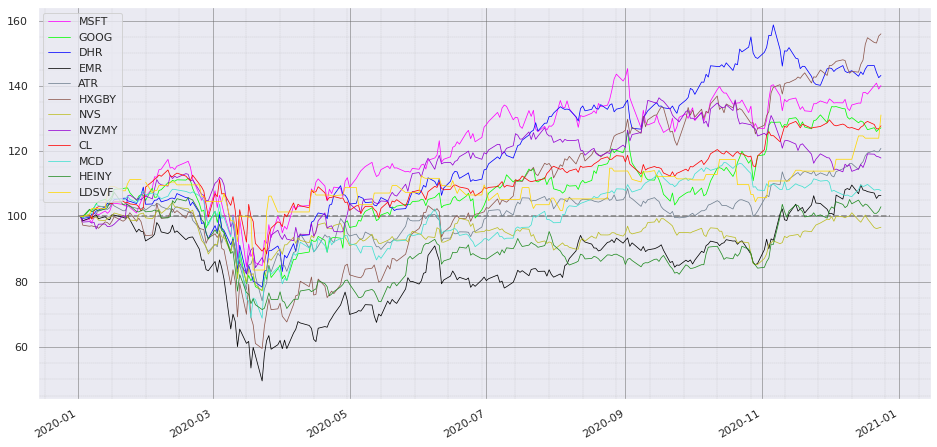

In [130]:
#print(pf.iloc[0])
#df_aux replaces pf.iloc[0]
print(color_dict.get('NVZMY'))

color_list = [color_dict.get(x, _) for x in pf.columns]



(pf / df_aux * 100).plot(color=color_list, figsize=(16, 8), linewidth=0.75)
plt.hlines(100, startd,endd,colors='gray', linestyles='--')
plt.legend(loc=2)

plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')


In [131]:
print(pf['NVZMY'].max())
print(pf['NVZMY'].idxmax())
#pf['2011-12-01':'2011-12-31']

65.98
2020-09-16 00:00:00


____

** Plot the Volume of stock traded each day.**

['MSFT',
 'GOOG',
 'DHR',
 'EMR',
 'ATR',
 'HXGBY',
 'NVS',
 'NVZMY',
 'CL',
 'MCD',
 'HEINY',
 'LDSVF']

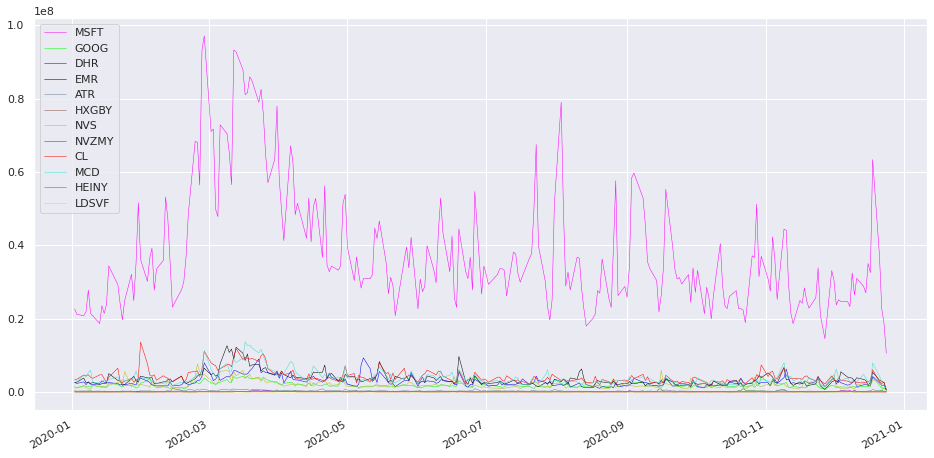

In [132]:
pf_vol.iloc[0]

(pf_vol).plot(color=color_list,figsize=(16, 8),linewidth=0.5)
plt.legend(loc=2);
list(pf_vol.columns)

In [133]:
print(pf_vol.max())
pf_vol.idxmax()

MSFT     97073557.0
GOOG      4330862.0
DHR       9313537.0
EMR      12610503.0
ATR        924172.0
HXGBY      942309.0
NVS       7630856.0
NVZMY      555848.0
CL       13591543.0
MCD      13693642.0
HEINY      944118.0
LDSVF         199.0
dtype: float64


MSFT    2020-02-28
GOOG    2020-10-30
DHR     2020-05-08
EMR     2020-03-09
ATR     2020-06-26
HXGBY   2020-02-14
NVS     2020-02-25
NVZMY   2020-03-26
CL      2020-01-31
MCD     2020-03-17
HEINY   2020-10-22
LDSVF   2020-10-21
dtype: datetime64[ns]

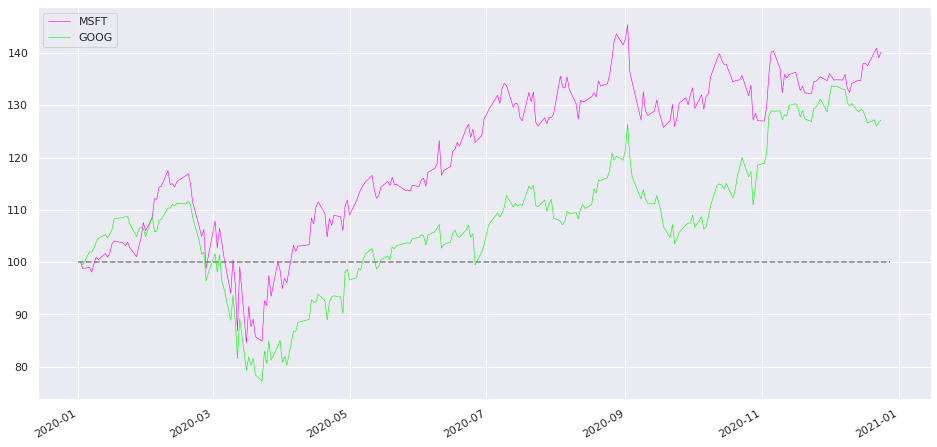

,MSFT,GOOG
2020-12-18,218.59,1731.01
2020-12-21,222.59,1739.37
2020-12-22,223.94,1723.50
2020-12-23,221.02,1732.38
2020-12-24,222.75,1738.85


In [134]:


#(pf1 / pf1.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))

(pf1 / df_aux[bool_list_high_tech] * 100).plot(color=color_list,figsize=(16, 8),linewidth=0.6)

plt.hlines(100, startd,endd,colors='gray', linestyles='--')
plt.legend(loc=2);
plt.show()
pf1.tail()


MSFT    10550572.0
GOOG      346753.0
Name: 2020-12-24 00:00:00, dtype: float64


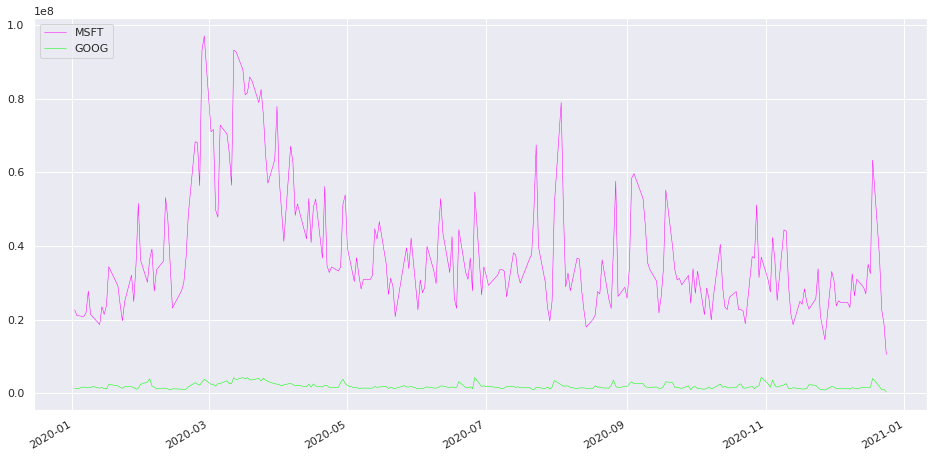

In [158]:
print(pf1_vol.iloc[-1])
(pf1_vol).plot(color=color_list,figsize=(16, 8),linewidth=0.5)

plt.legend(loc=2);

**Bonus: What happened that day? **

In [136]:
#rewrite retrieve

In [137]:
pf1_vol.max()

    

MSFT    97073557.0
GOOG     4330862.0
dtype: float64

In [138]:
pf1_vol.idxmax()

MSFT   2020-02-28
GOOG   2020-10-30
dtype: datetime64[ns]

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

MSFT     1.701634e+10
GOOG     7.020371e+09
DHR      1.500610e+09
EMR      6.205006e+08
ATR      9.894115e+07
HXGBY    5.474803e+07
NVS      6.475720e+08
NVZMY    2.799973e+07
CL       9.855427e+08
MCD      2.158572e+09
HEINY    4.433578e+07
LDSVF    1.644536e+06
total    2.560129e+10
dtype: float64
MSFT    2020-08-03
GOOG    2020-10-30
DHR     2020-05-08
EMR     2020-03-09
ATR     2020-06-26
HXGBY   2020-02-14
NVS     2020-02-25
NVZMY   2020-12-10
CL      2020-01-31
MCD     2020-02-28
HEINY   2020-10-22
LDSVF   2020-10-21
total   2020-02-28
dtype: datetime64[ns]


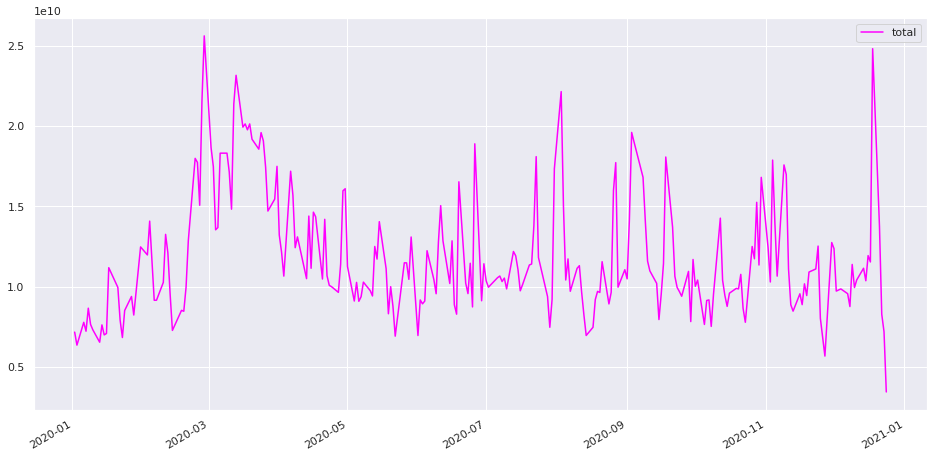

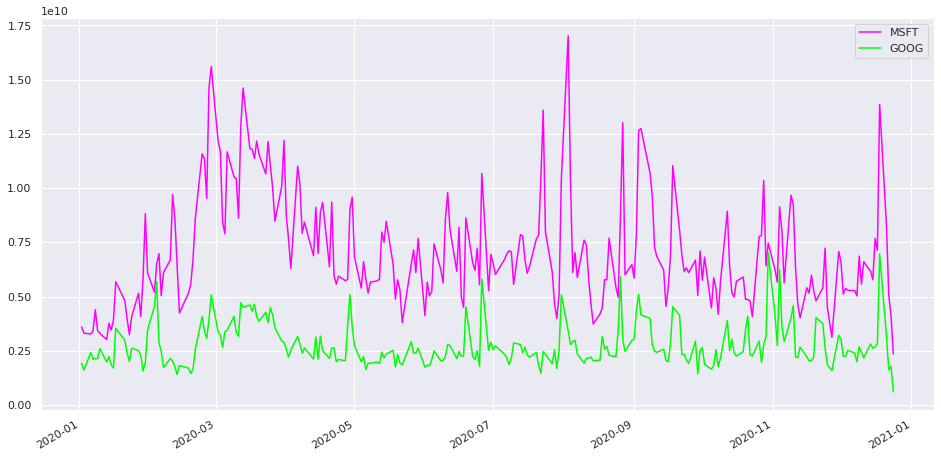

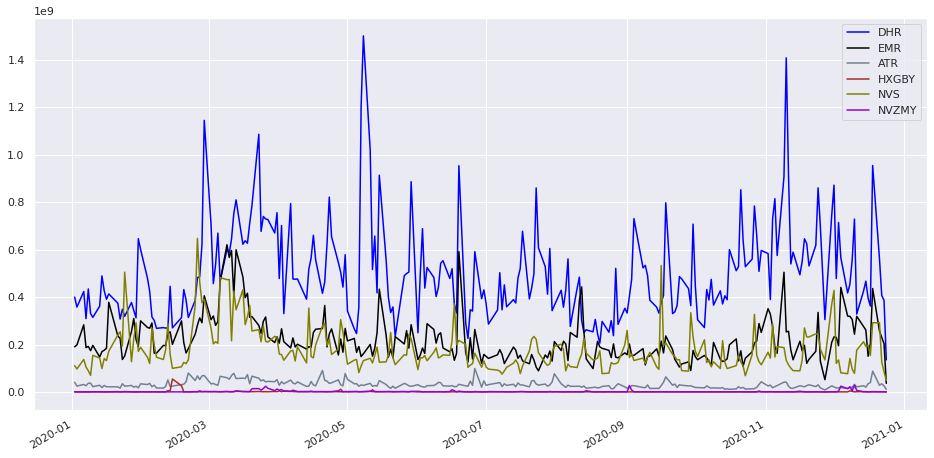

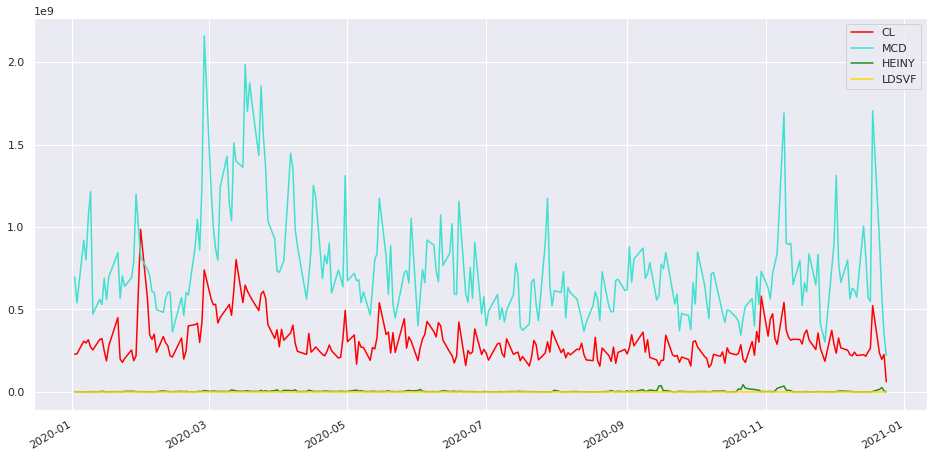

In [159]:
df_cap = initialize_df(symbol_list, startd, endd)

df_cap=(pf*pf_vol)
df_cap['total']=(pf*pf_vol).sum(axis=1)
df_cap.tail()
print(df_cap.max())
print(df_cap.idxmax())

df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
df_cap['total'].plot(color=color_list,figsize=(16,8))
plt.legend();


df_cap=pf1*pf1_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


pf2 = pf_filtered(pf,startd,bool_list_industry)
pf2_vol = pf_filtered(pf_vol,startd,bool_list_industry)
df_cap=pf2*pf2_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
color_list = [color_dict.get(x, _) for x in pf2.columns]
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


pf3 = pf_filtered(pf,startd,bool_list_consumer)
pf3_vol = pf_filtered(pf_vol,startd,bool_list_consumer)
df_cap=pf3*pf3_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
color_list = [color_dict.get(x, _) for x in pf3.columns]
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();

** Plot this "Total Traded" against the time index.**

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

            MSFT   adj.close  MA20  MA50
2020-01-02     0  158.935751   NaN   NaN
2020-01-03     0  156.956723   NaN   NaN
2020-01-06     0  157.362424   NaN   NaN
2020-01-07     0  155.927628   NaN   NaN
2020-01-08     0  158.411309   NaN   NaN


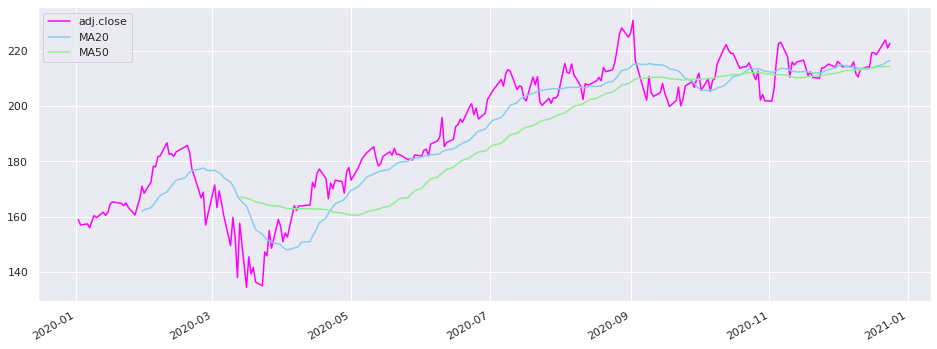

In [140]:
# Code here
MSFT = initialize_df(['MSFT'], '2020-01-01', endd)

MSFT['adj.close'] = pf['MSFT']
MSFT.dropna(inplace=True)
MSFT['MA20']=pf['MSFT'].rolling(window=20).mean()
MSFT['MA50']=pf['MSFT'].rolling(window=50).mean()
color_list = [color_dict.get(x, _) for x in pf.columns]
MSFT[['adj.close','MA20','MA50']].plot(color=['magenta','skyblue','lightgreen'],figsize=(16,6));
print(MSFT.head())


______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [141]:
#car_comp = pd.concat([tesla["open"],gm['open'],ford['open']], axis = 1)

#car_comp.columns = ['Tesla','GM','Ford']

#car_comp.head()

#scatter_matrix(car_comp,figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});
# alpha - it is darker where points overlap

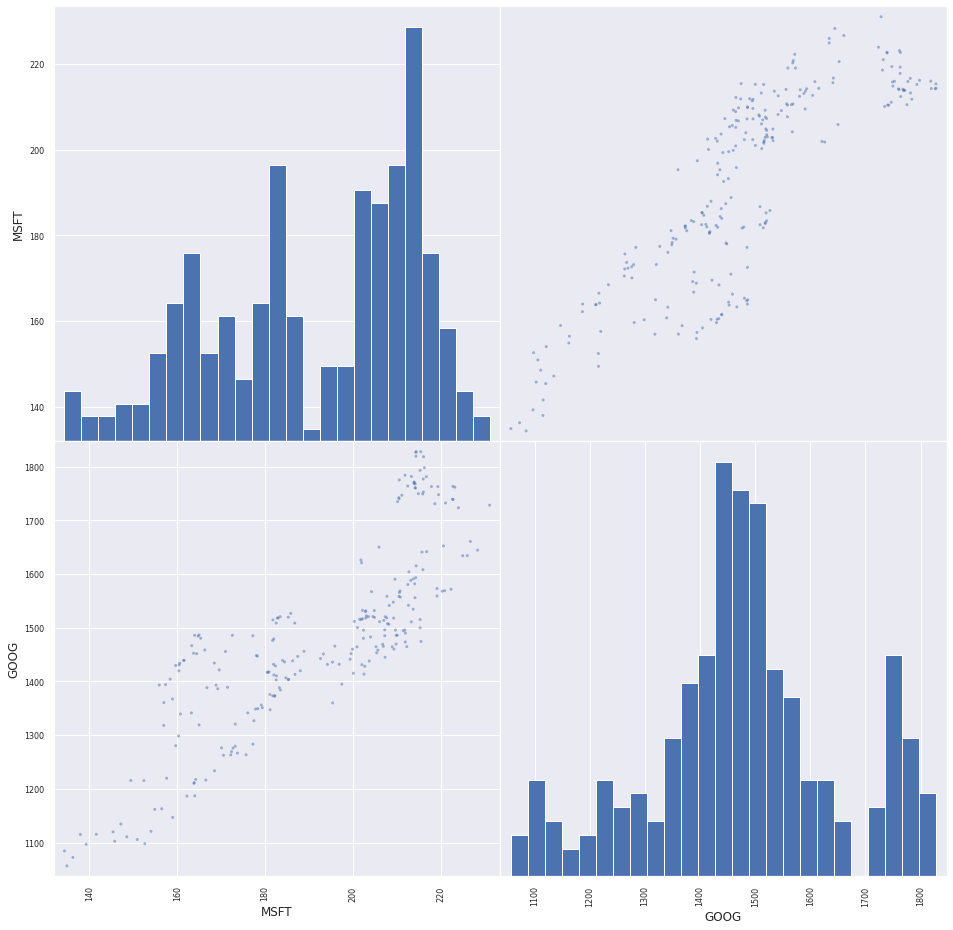

In [142]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(pf, figsize=(16,16),alpha=0.2, hist_kwds={'bins':25});

# alpha - it is darker where points overlap

from pandas.plotting import scatter_matrix
scatter_matrix(pf1, figsize=(16,16),alpha=0.5, hist_kwds={'bins':25});
# alpha - it is darker where points overlap

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [143]:
#tesla['returns'] = (tesla['close']/tesla['close'].shift(1))-1
#tesla.head()

In [144]:
#tesla['returns']=tesla['close'].pct_change(1)
#tesla.head()
#gm['returns']=gm['close'].pct_change(1)
#ford['returns']=ford['close'].pct_change(1)

In [145]:
#as a %
df_returns = ((pf/pf.shift(1))-1)*100
#ret = pf.pct_change(1)
pprint.pprint(df_returns.head())

print('___________________')

df1_returns = pf_filtered(df_returns, startd, bool_list_high_tech)


df2_returns = pf_filtered(df_returns, startd, bool_list_industry)

df3_returns = pf_filtered(df_returns, startd, bool_list_consumer)


                MSFT      GOOG       DHR       EMR       ATR     HXGBY  \
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -1.245175 -0.490723 -0.618916 -1.368095  0.316678 -2.708333   
2020-01-06  0.258479  2.465715  0.298411  0.824392  0.008769 -0.330121   
2020-01-07 -0.911778 -0.062401  0.983119  0.246593 -0.999562  0.134276   
2020-01-08  1.592842  0.788035  0.102479  0.349560  0.274555 -0.250313   

                 NVS     NVZMY        CL       MCD     HEINY     LDSVF  
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN  
2020-01-03 -0.168510 -1.759771 -0.146800 -0.353603 -0.056001  0.000000  
2020-01-06  0.675177  0.145803  0.690973  1.124550  2.231976  0.565229  
2020-01-07 -0.995494 -0.461730 -1.372463  0.148273 -0.739929  1.815363  
2020-01-08  0.000000  0.275816  2.546262  1.618714  0.331309  0.000000  
___________________


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

In [146]:
#ford['returns'].plot(kind='kde', figsize=(10,8), label='Ford', color='forestgreen')
#tesla['returns'].plot(kind='kde', figsize=(10,8), label='Tesla', color='steelblue')
#gm['returns'].plot(kind='kde', figsize=(10,8), label='GM', color='darkorange');
#plt.legend();

In [147]:
#df_returns= pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
#df_returns.columns = ['Tesla', 'Ford', 'GM']
#df_returns.plot(kind='box', figsize=(8,11))

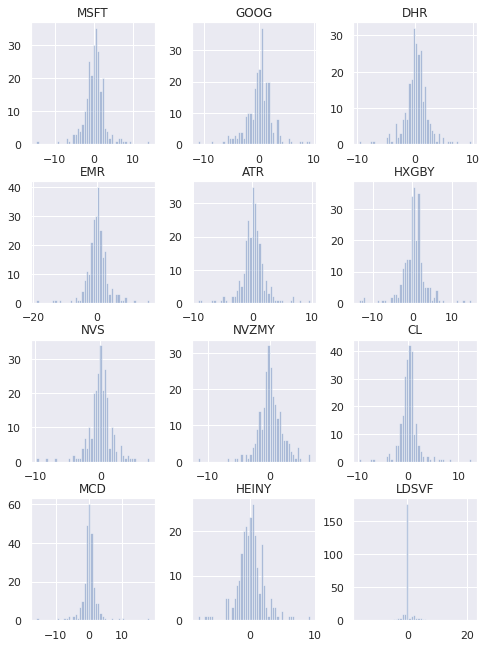

In [148]:
df_returns.hist(bins=50,figsize=(8,11),alpha=0.4);


In [163]:
color_list = [color_dict.get(x, _) for x in df_returns.columns]
color_list
color_dict

{'MSFT': 'magenta',
 'GOOG': 'lime',
 'DHR': 'blue',
 'EMR': 'black',
 'ATR': 'slategrey',
 'HXGBY': 'brown',
 'NVS': 'olive',
 'NVZMY': 'darkviolet',
 'CL': 'red',
 'MCD': 'turquoise',
 'HEINY': 'forestgreen',
 'LDSVF': 'gold'}

In [161]:
df_returns.fillna(value=0,inplace=True)
data = []

for i in df_returns.columns:
    data.append(df_returns[i].values)
    
data

[array([ 0.00000000e+00, -1.24517495e+00,  2.58479385e-01, -9.11777652e-01,
         1.59284173e+00,  1.24929727e+00, -4.62705904e-01,  1.20242965e+00,
        -7.04311612e-01,  6.47628446e-01,  1.83233239e+00,  5.59667810e-01,
        -3.59066427e-01, -4.80480481e-01,  6.15570308e-01, -1.00767754e+00,
        -1.67232186e+00,  1.95957604e+00,  1.55928925e+00,  2.82075696e+00,
        -1.47586526e+00,  2.43787816e+00,  3.29166189e+00, -1.22140795e-01,
         2.07337410e+00,  1.41589065e-01,  2.61569416e+00, -2.25755167e+00,
         1.46389070e-01, -5.41389205e-01,  8.92711339e-01,  1.01429728e+00,
         2.99097367e-01, -1.52712516e+00, -3.16126234e+00, -4.31155160e+00,
        -1.65018433e+00,  1.24947938e+00, -7.04589528e+00,  2.42129220e+00,
         6.65391025e+00, -4.79194398e+00,  3.67150933e+00, -2.50952800e+00,
        -2.82672761e+00, -6.77724825e+00,  6.83840127e+00, -4.53020134e+00,
        -9.48382477e+00,  1.42168848e+01, -1.47390292e+01,  8.23364348e+00,
        -4.2

In [168]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
    
color_list = [color_dict.get(x, _) for x in df_returns.columns]
fig = ff.create_distplot(data, df_returns.columns, colors=color_list,show_hist=False)
#fig.update_layout(legend=dict(orientation="h",yanchor="bottom", y=1.02,xanchor="right",x=1))
fig.show()

In [86]:
#daily return correlatio
corr_matrix = df_returns.corr()
corr_matrix

,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
MSFT,1.000000,0.852774,0.738503,0.522836,0.581864,0.685594,0.694541,0.342706,0.678070,0.652409,0.437864,0.153981
GOOG,0.852774,1.000000,0.669694,0.554030,0.566522,0.638997,0.641658,0.318900,0.621092,0.654728,0.506496,0.120376
DHR,0.738503,0.669694,1.000000,0.467969,0.537930,0.601852,0.683355,0.275415,0.633404,0.607103,0.381328,0.237756
EMR,0.522836,0.554030,0.467969,1.000000,0.615638,0.676198,0.555297,0.220426,0.406397,0.722227,0.643179,0.139760
ATR,0.581864,0.566522,0.537930,0.615638,1.000000,0.623525,0.613204,0.342786,0.600063,0.602508,0.510502,0.104537
HXGBY,0.685594,0.638997,0.601852,0.676198,0.623525,1.000000,0.673714,0.459635,0.609891,0.629690,0.610034,0.313291
NVS,0.694541,0.641658,0.683355,0.555297,0.613204,0.673714,1.000000,0.395126,0.674219,0.583462,0.523287,0.265648
NVZMY,0.342706,0.318900,0.275415,0.220426,0.342786,0.459635,0.395126,1.000000,0.344226,0.231868,0.222580,0.207004
CL,0.678070,0.621092,0.633404,0.406397,0.600063,0.609891,0.674219,0.344226,1.000000,0.522863,0.422306,0.158454
MCD,0.652409,0.654728,0.607103,0.722227,0.602508,0.629690,0.583462,0.231868,0.522863,1.000000,0.490744,0.043801


<AxesSubplot:>

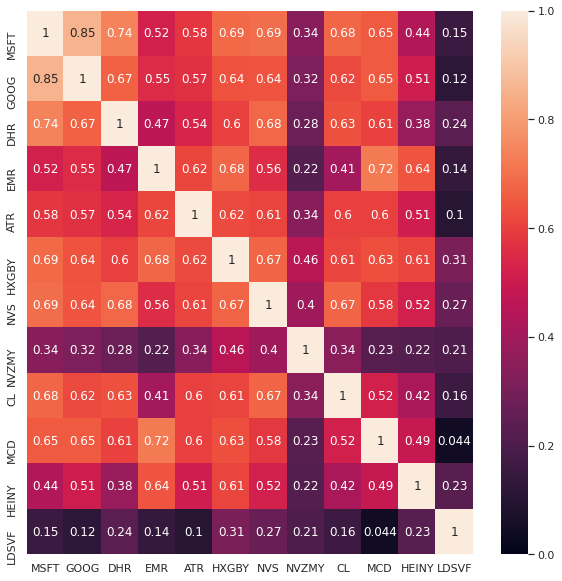

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,vmin=0,  annot = True)

In [88]:
plt.figure(clear=True)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [110]:
import seaborn as sns 

sns.set()
df3_returns = df3_returns.fillna(0)
print(df3_returns.head())





data_consumer = []

for i in df3_returns.columns:
    data_consumer.append(df3_returns[i].values)

color_list = [color_dict.get(x, _) for x in pf3.columns]
#df3_returns.plot(kind='kde',color=color_list, figsize=(8,8))

fig = ff.create_distplot(data_consumer, df3_returns.columns, show_hist=False)
fig.show()

                  CL       MCD     HEINY     LDSVF
2020-01-02  0.000000  0.000000  0.000000  0.000000
2020-01-03 -0.146800 -0.353603 -0.056001  0.000000
2020-01-06  0.690973  1.124550  2.231976  0.565229
2020-01-07 -1.372463  0.148273 -0.739929  1.815363
2020-01-08  2.546262  1.618714  0.331309  0.000000


** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

** Try also creating some box plots comparing the returns. **

In [90]:
df_returns[['MSFT', 'GOOG']]

,MSFT,GOOG
2020-01-02,0.000000,0.000000
2020-01-03,-1.245175,-0.490723
2020-01-06,0.258479,2.465715
2020-01-07,-0.911778,-0.062401
2020-01-08,1.592842,0.788035
...,...,...
2020-12-18,-0.378270,-0.966302
2020-12-21,1.829910,0.482955
2020-12-22,0.606496,-0.912399
2020-12-23,-1.303921,0.515231


## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

In [91]:
#pd.plotting.scatter_matrix(df_returns, figsize=(16,16), alpha= 0.4,hist_kwds={'bins':50});

** It looks like Google and Microsoft do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

<AxesSubplot:>

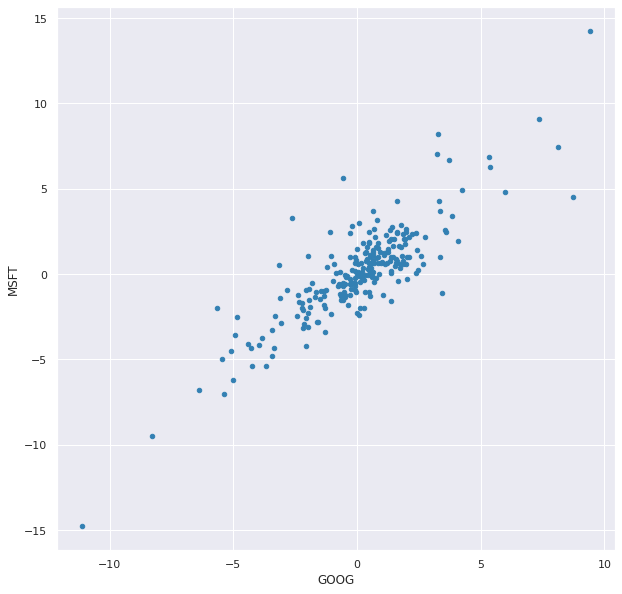

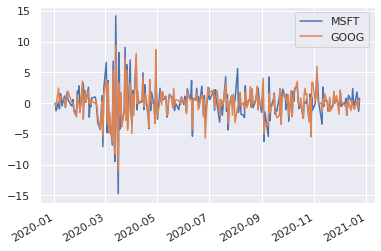

In [109]:
_colors = np.array([[0.2, 0.5, 0.7]])
df_returns[['MSFT','GOOG']].plot(kind='scatter', x='GOOG', y='MSFT', c=_colors, figsize=(10,10));
df_returns[['MSFT','GOOG']].plot()

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [93]:
#print(df_returns.head())
#tesla['returns']
#(1+tesla['returns'])
#(1+tesla['returns']).cumprod()
pprint.pprint(df1_returns['MSFT'])
print('\n')
(1+df1_returns['MSFT']).cumprod()

print(df_returns.head())

2020-01-02         NaN
2020-01-03   -1.245175
2020-01-06    0.258479
2020-01-07   -0.911778
2020-01-08    1.592842
                ...   
2020-12-18   -0.378270
2020-12-21    1.829910
2020-12-22    0.606496
2020-12-23   -1.303921
2020-12-24    0.782735
Name: MSFT, Length: 249, dtype: float64


                MSFT      GOOG       DHR       EMR       ATR     HXGBY  \
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-03 -1.245175 -0.490723 -0.618916 -1.368095  0.316678 -2.708333   
2020-01-06  0.258479  2.465715  0.298411  0.824392  0.008769 -0.330121   
2020-01-07 -0.911778 -0.062401  0.983119  0.246593 -0.999562  0.134276   
2020-01-08  1.592842  0.788035  0.102479  0.349560  0.274555 -0.250313   

                 NVS     NVZMY        CL       MCD     HEINY     LDSVF  
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2020-01-03 -0.168510 -1.759771 -0.146800 -0.353603 -0.056001  0.000000  
2020-01-06  0.675177  0.145803  0.690973 

In [94]:
#tesla['cumRet']=(1+tesla['returns']).cumprod()
#tesla.head(10)
#gm['cumRet']=(1+gm['returns']).cumprod()
#ford['cumRet']=(1+ford['returns']).cumprod()

df_cum_returns = initialize_df(symbol_list, startd, endd)
df_cum_returns = (1+df_returns).cumprod()
df_cum_returns.head()

,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,-0.245175,0.509277,0.381084,-0.368095,1.316678,-1.708333,0.831490,-0.759771,0.853200,0.646397,0.943999,1.000000
2020-01-06,-0.308548,1.765009,0.494804,-0.671549,1.328224,-1.144376,1.392893,-0.870548,1.442739,1.373302,3.050981,1.565229
2020-01-07,-0.027221,1.654871,0.981255,-0.837149,0.000582,-1.298039,0.006276,-0.468589,-0.537367,1.576925,0.793472,4.406687
2020-01-08,-0.070579,2.958966,1.081813,-1.129782,0.000742,-0.973123,0.006276,-0.597834,-1.905644,4.129517,1.056357,4.406687


In [95]:
df1_cum_returns = initialize_df(symbol_list, startd, endd)
df1_cum_returns = (1+df1_returns).cumprod()
df1_cum_returns.head()



,MSFT,GOOG
2020-01-02,NaN,NaN
2020-01-03,-0.245175,0.509277
2020-01-06,-0.308548,1.765009
2020-01-07,-0.027221,1.654871
2020-01-08,-0.070579,2.958966


In [96]:
df2_cum_returns = initialize_df(symbol_list, startd, endd)
df2_cum_returns = (1+df2_returns).cumprod()
df2_cum_returns.head()

,DHR,EMR,ATR,HXGBY,NVS,NVZMY
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.381084,-0.368095,1.316678,-1.708333,0.831490,-0.759771
2020-01-06,0.494804,-0.671549,1.328224,-1.144376,1.392893,-0.870548
2020-01-07,0.981255,-0.837149,0.000582,-1.298039,0.006276,-0.468589
2020-01-08,1.081813,-1.129782,0.000742,-0.973123,0.006276,-0.597834


In [97]:
df3_cum_returns = initialize_df(symbol_list, startd, endd)
df3_cum_returns = (1+df3_returns).cumprod()
df3_cum_returns.head()

,CL,MCD,HEINY,LDSVF
2020-01-02,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.853200,0.646397,0.943999,1.000000
2020-01-06,1.442739,1.373302,3.050981,1.565229
2020-01-07,-0.537367,1.576925,0.793472,4.406687
2020-01-08,-1.905644,4.129517,1.056357,4.406687


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

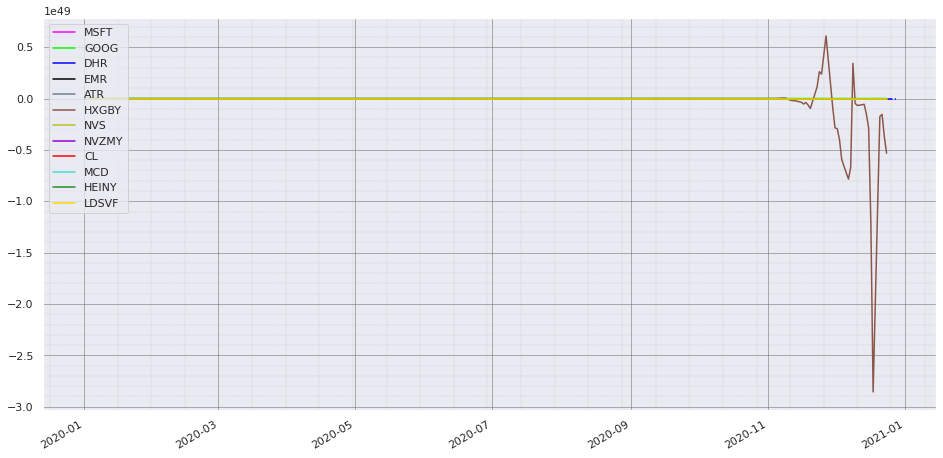

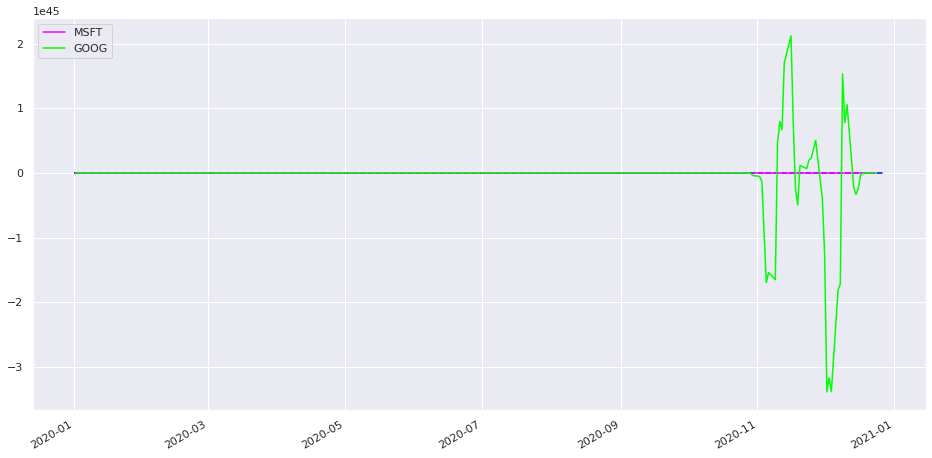

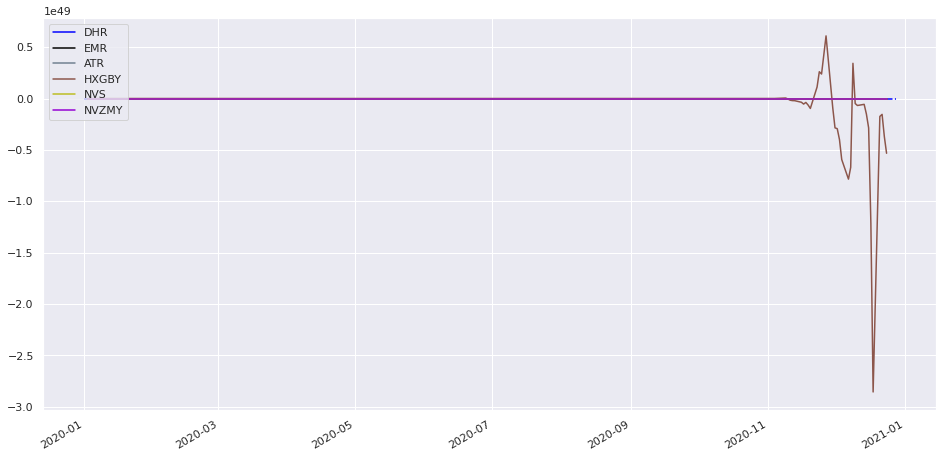

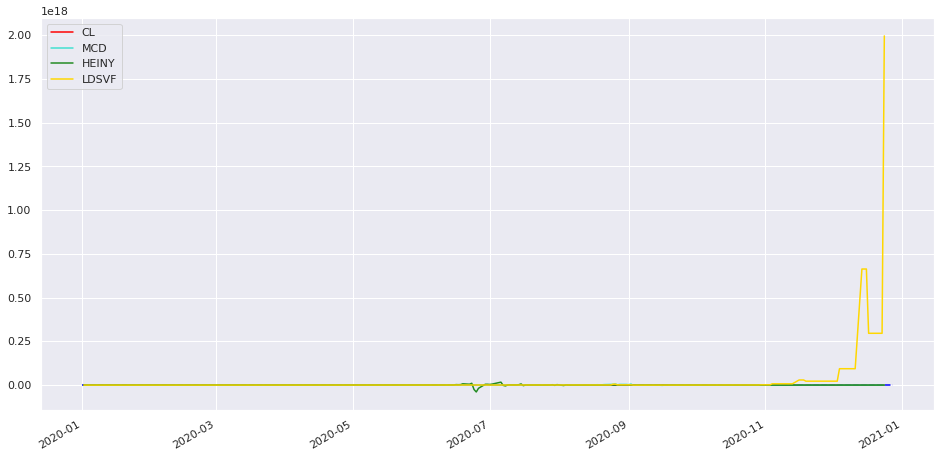

In [98]:
#tesla['cumRet'].plot(label='Tesla', figsize=(16,8))
#gm['cumRet'].plot(label='gm', figsize=(16,8))
#ford['cumRet'].plot(label='Ford', figsize=(16,8));
import seaborn as sns 
sns.set()
#sns.reset_orig



#plt.figure()



color_list = [color_dict.get(x, _) for x in pf.columns]
df_cum_returns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')


color_list = [color_dict.get(x, _) for x in pf1.columns]
df_cum_returns[['MSFT','GOOG']].plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);


color_list = [color_dict.get(x, _) for x in pf2.columns]
df2_cum_returns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf3.columns]
df3_cum_returns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);



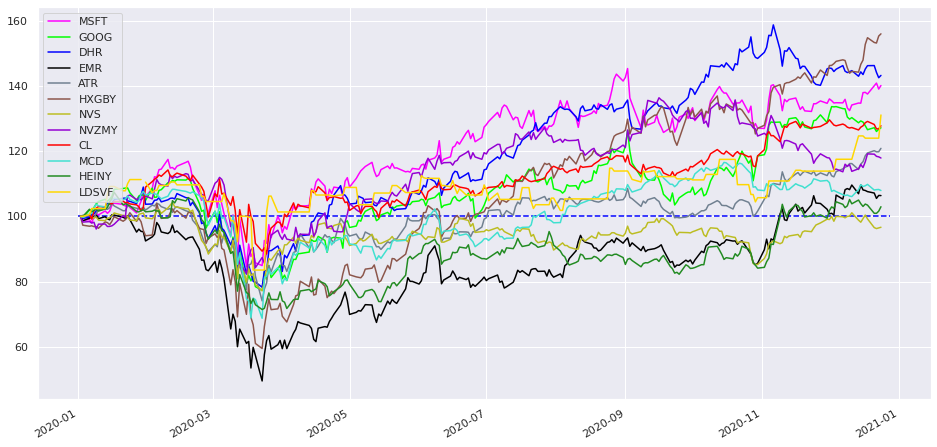

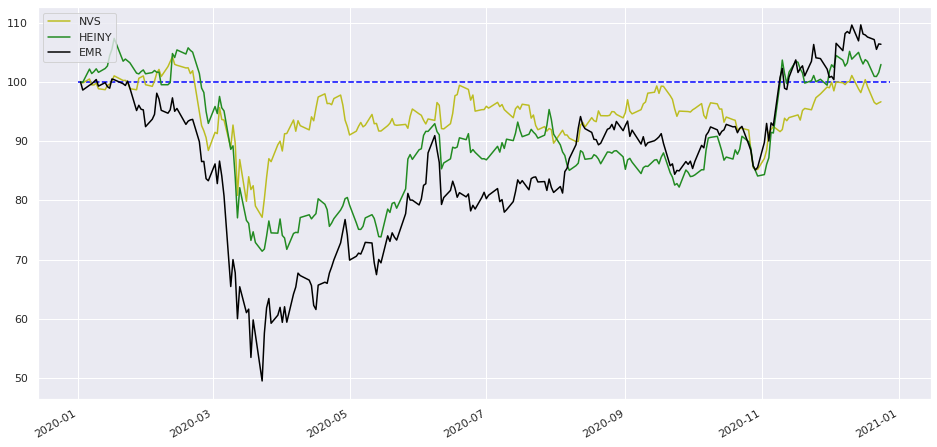

In [99]:
color_list = [color_dict.get(x, _) for x in pf.columns]
(pf / pf.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in ['NVS','HEINY','EMR']]
(pf[['NVS','HEINY','EMR']] / pf[['NVS','HEINY','EMR']].iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

                MSFT      GOOG       DHR       EMR       ATR     HXGBY  \
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-03 -1.245175 -0.490723 -0.618916 -1.368095  0.316678 -2.708333   
2020-01-06  0.258479  2.465715  0.298411  0.824392  0.008769 -0.330121   
2020-01-07 -0.911778 -0.062401  0.983119  0.246593 -0.999562  0.134276   
2020-01-08  1.592842  0.788035  0.102479  0.349560  0.274555 -0.250313   

                 NVS     NVZMY        CL       MCD     HEINY     LDSVF  
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2020-01-03 -0.168510 -1.759771 -0.146800 -0.353603 -0.056001  0.000000  
2020-01-06  0.675177  0.145803  0.690973  1.124550  2.231976  0.565229  
2020-01-07 -0.995494 -0.461730 -1.372463  0.148273 -0.739929  1.815363  
2020-01-08  0.000000  0.275816  2.546262  1.618714  0.331309  0.000000  
_____________
                MSFT      GOOG       DHR       EMR       ATR     HXGBY  \
2020-01-02  0.000000  0.00000

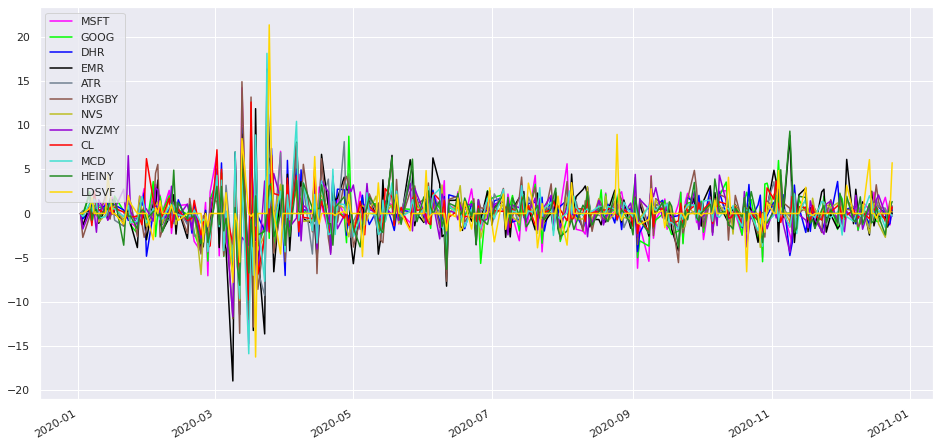

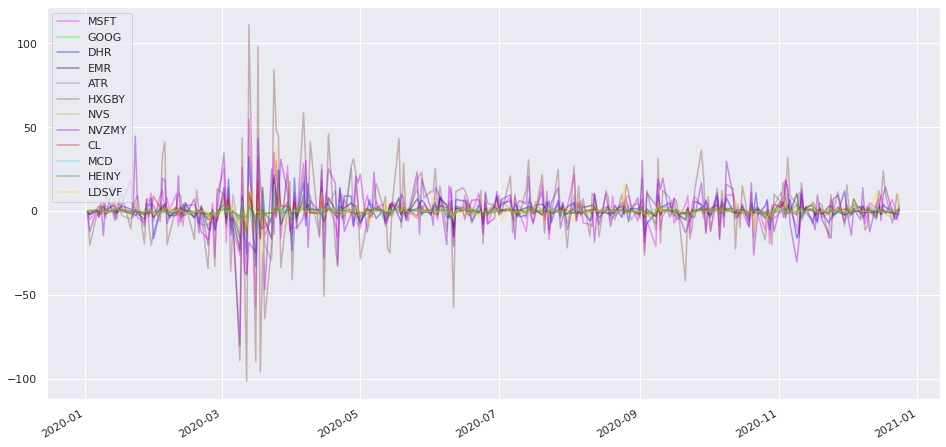

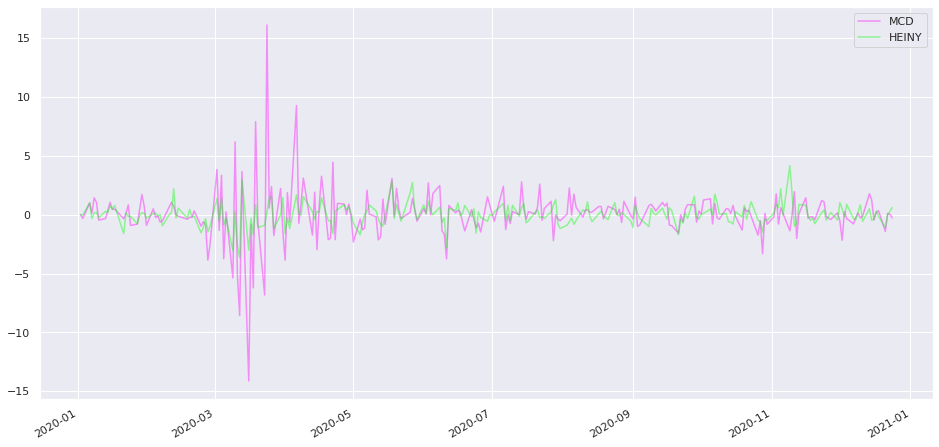

In [100]:
print(df_returns.head())
#sns.reset_orig()
df_returns_aux = determine_earliest_notation(df_returns)

print('_____________')
print(df_returns.head())

color_list = [color_dict.get(x, _) for x in pf.columns]

df_returns.plot(color=color_list, figsize=(16,8))
(df_returns / df_returns_aux).plot(color=color_list,figsize=(16,8), alpha=0.4);

color_list_aux = [color_dict.get(x, _) for x in ['MCD','HEINY']]
(df_returns[['MCD','HEINY']] / df_returns_aux[['MCD','HEINY']]).plot(color=color_list,figsize=(16,8), alpha=0.4);

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!